#Importing modules

In [ ]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import numpy as np
import warnings
from itertools import product
from fbprophet import Prophet as fb_model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

#Dataset range

In [ ]:
end=dt.datetime.now()
start=dt.date(end.year-4, end.month, end.day)
kryptolist=['BTC-USD', 'ETH-USD','XRP-USD','LTC-USD']

#Reading dataset from Yahoo

In [ ]:
df=reader.get_data_yahoo(kryptolist, start,end)['Adj Close']

In [ ]:
df

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
Date,,,,
2017-05-29,2175.469971,231.910995,0.205324,24.142000
2017-05-30,2286.409912,230.669006,0.246590,25.297600
2017-05-31,2407.879883,222.238998,0.333657,28.803400
2017-06-01,2488.550049,223.774994,0.303448,28.944700
2017-06-02,2515.350098,224.376007,0.294580,27.660999
...,...,...,...,...
2021-05-25,39294.199219,2888.698730,1.033725,199.224335
2021-05-26,38436.968750,2736.488525,0.970235,193.121094
2021-05-27,35697.605469,2419.906250,0.900148,177.320663


#Calculating daily return price 

In [ ]:
daily_returns=df.pct_change().dropna(axis=0)

In [ ]:
daily_returns

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
Date,,,,
2017-05-31,0.041790,-0.036546,0.353084,0.138582
2017-06-01,-0.369386,0.006911,-0.090539,0.004906
2017-06-02,-0.678552,0.002686,-0.029224,-0.044350
2017-06-03,-1.130683,0.093397,0.016406,0.010061
2017-06-04,-50.504154,0.012766,-0.018069,0.103940
...,...,...,...,...
2021-05-25,-3.959700,0.067268,0.058942,0.085704
2021-05-26,-1.939230,-0.052692,-0.061419,-0.030635
2021-05-27,2.266866,-0.115689,-0.072237,-0.081816


#Calculating daily cunulative return price

In [ ]:
daily_cum_returns=(daily_returns+1).cumprod()-1

In [ ]:
daily_cum_returns

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
Date,,,,
2017-05-31,0.041790,-0.036546,0.353084,0.138582
2017-06-01,-0.343033,-0.029887,0.230577,0.144168
2017-06-02,-0.788819,-0.027282,0.194615,0.093424
2017-06-03,-1.027598,0.063567,0.214214,0.104425
2017-06-04,0.366207,0.077145,0.192275,0.219218
...,...,...,...,...
2021-05-25,-0.544527,11.523133,3.192080,6.875227
2021-05-26,-1.427794,10.863269,2.934608,6.633969
2021-05-27,-2.397545,9.490817,2.650383,6.009387


#Plotting all cryptocurrency 

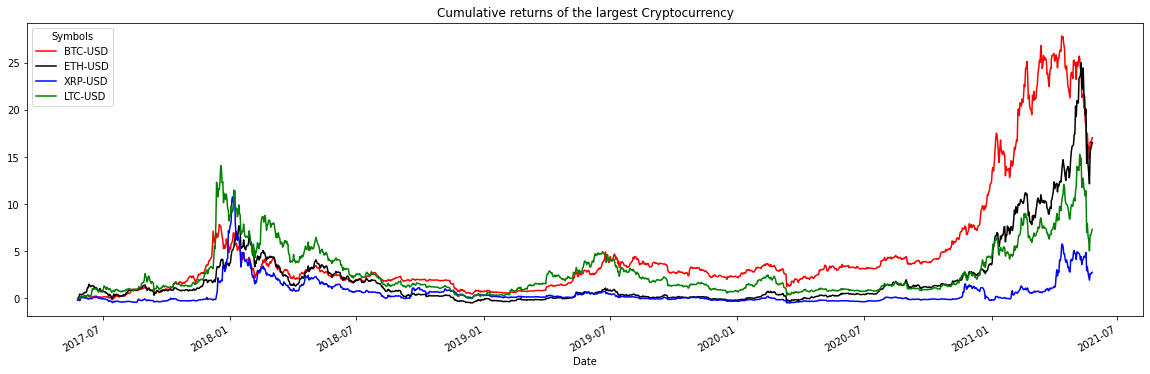

In [ ]:
colors=['r','k','b','g']
daily_cum_returns.plot(color=colors, figsize=(20,6))
plt.title('Cumulative returns of the largest Cryptocurrency')
plt.show()

#Forcasting using fbprophet model

In [ ]:
end1=dt.date(end.year - 1, end.month, end.day) #1 year back
end2=dt.date(end.year , end.month-4 , end.day) #4 months back
start1=dt.date(end1.year-3, end.month, end.day)

In [ ]:
df1=reader.get_data_yahoo(kryptolist, start1, end1)['Adj Close']
df2=reader.get_data_yahoo(kryptolist, start1, end2)['Adj Close']

In [ ]:
modelfb1=fb_model()
df1=df1.reset_index()
df1[['ds','y']]=df1[['Date','BTC-USD']]
modelfb1.fit(df1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
modelfb2=fb_model()
df2=df2.reset_index()
df2[['ds','y']]=df2[['Date','BTC-USD']]
modelfb2.fit(df2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=modelfb1.make_future_dataframe(periods=365)
future1=modelfb2.make_future_dataframe(periods=365)

In [ ]:
forcast1=modelfb1.predict(future)
forcast2=modelfb2.predict(future1)

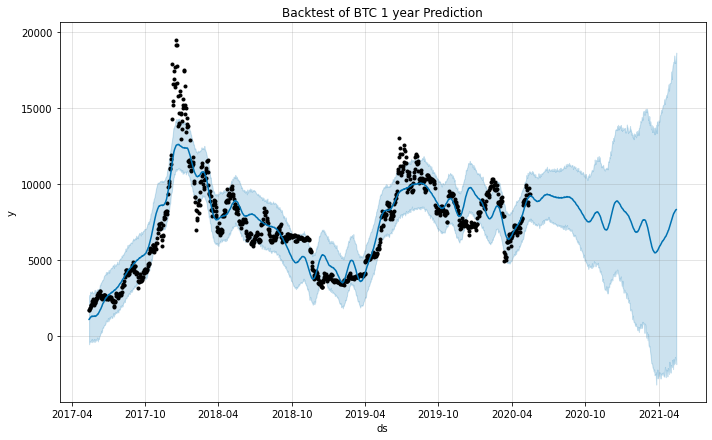

In [ ]:
modelfb1.plot(forcast1)
plt.title('Backtest of BTC 1 year Prediction')
plt.show()

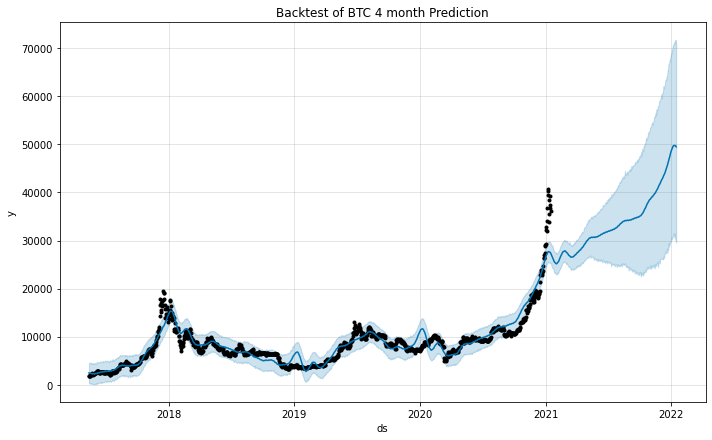

In [ ]:
#4 months prediction
modelfb2.plot(forcast2)
plt.title('Backtest of BTC 4 month Prediction')
plt.show()

In [ ]:
modelfb3=fb_model()
df=df.reset_index()
df[['ds','y']]=df[['Date','BTC-USD']]
modelfb3.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future3=modelfb3.make_future_dataframe(periods=100)

In [ ]:
forcast3=modelfb3.predict(future3)

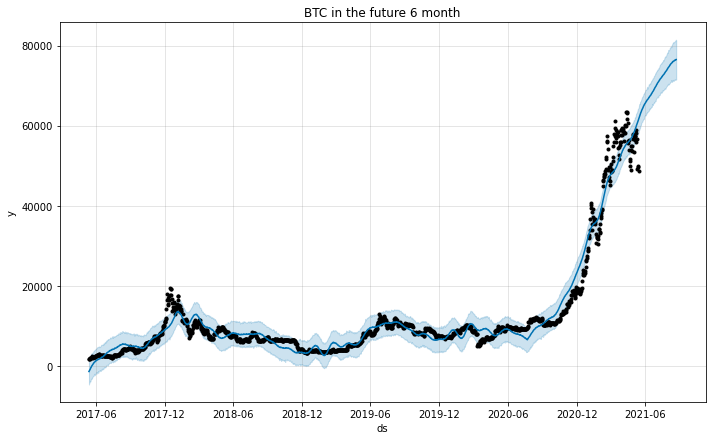

In [ ]:
#6 months prediction
modelfb3.plot(forcast3)
plt.title('BTC in the future 6 month')
plt.show()

#Forcasting using SARIMA model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
from pandas import read_csv
from datetime import datetime

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def custom_parser(x):
	return datetime.strptime(x, '%Y-%m')

In [ ]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [ ]:
model_SARIMAX = SARIMAX(train['BTC-USD'],order = (1, 1, 1),seasonal_order =(2, 1, 1, 12))

In [ ]:
BitCoin_SARIMAX = model_SARIMAX.fit()
BitCoin_SARIMAX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            BTC-USD   No. Observations:                 1446
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood              -11547.841
Date:                            Wed, 26 May 2021   AIC                          23107.682
Time:                                    11:21:11   BIC                          23139.287
Sample:                                         0   HQIC                         23119.483
                                           - 1446                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000     37.518     -0.027      0.979     -74.533      72.534
ma.L1          1.0000     37.533      0.027      0.979     -72.564      74.564
ar.S.L12      -0.0754      0.013     -5.756      0.000      -0.101      -0.050
ar.S.L24      -0.0896      0.013     -7.132      0.000      -0.114      -0.065
ma.S.L12      -0.9785      0.008   -128.272      0.000      -0.993      -0.964
sigma2      6.152e+05   1.21e+04     50.851      0.000    5.92e+05    6.39e+05
===================================================================================
Ljung-Box (Q):                      126.22   Jarque-Bera (JB):             36690.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.04   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

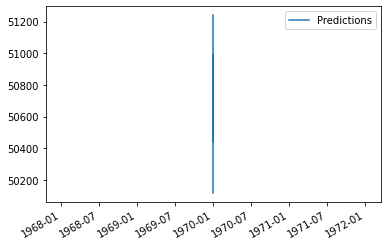

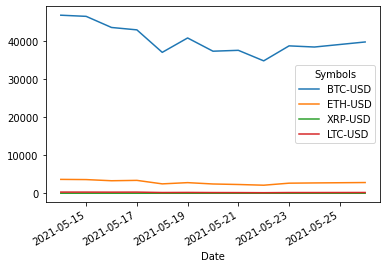

In [ ]:
start_s = len(train)
end_s = len(train) + len(test) - 1
predictions = BitCoin_SARIMAX.predict(start_s, end_s,typ = 'levels').rename("Predictions")
predictions.index = pd.to_datetime(predictions.index)
predictions.plot(legend = True)
test[kryptolist].plot(legend = True)

In [ ]:
errors=mean_squared_error(test['BTC-USD'], predictions)
print(errors)

121975229.1558383


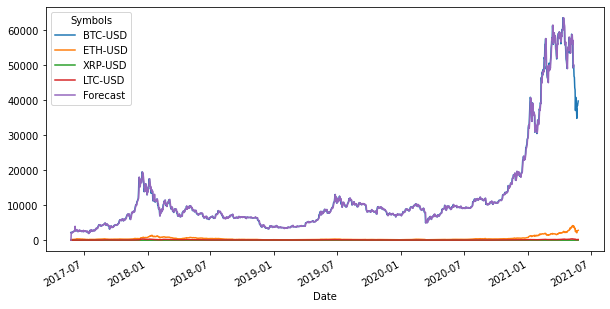

In [ ]:
forecast = BitCoin_SARIMAX.predict(start_s = len(df), 
                          end_s = (len(df)-1) + 2 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df[kryptolist].plot(figsize = (10, 5), legend = True)
forecast.plot(legend = True)

<H2> ETS Model for Time Series Prediction 

In [ ]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import read_csv
import io
import matplotlib.pyplot as plt
from numpy import array
from datetime import datetime

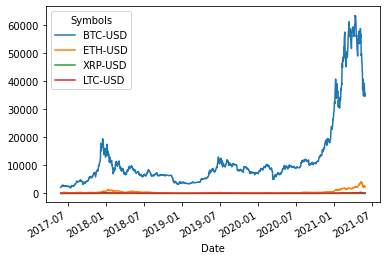

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
count,1458.000000,1458.000000,1458.000000,1458.000000
mean,12321.820053,501.639817,0.431813,90.793039
std,13014.636671,601.415632,0.364150,65.073973
min,1929.819946,84.308296,0.139635,23.464331
25%,6296.189941,186.666405,0.238750,47.347574
50%,8337.452637,282.154297,0.303470,61.344456
75%,10936.553711,495.867493,0.470890,117.493351
max,63503.457031,4168.701172,3.377810,386.450775


In [ ]:
df.plot()
plt.show()
df.describe()

<H1> Forecasting Using Arch Model

<H1> ARCH Model for Voltility Forecasting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

In [ ]:
returns=df.pct_change(1)*100

In [ ]:
sq_returns = returns.mul(returns)

<h2> Ploting Returns vs. Sq_Returns (Volatility)

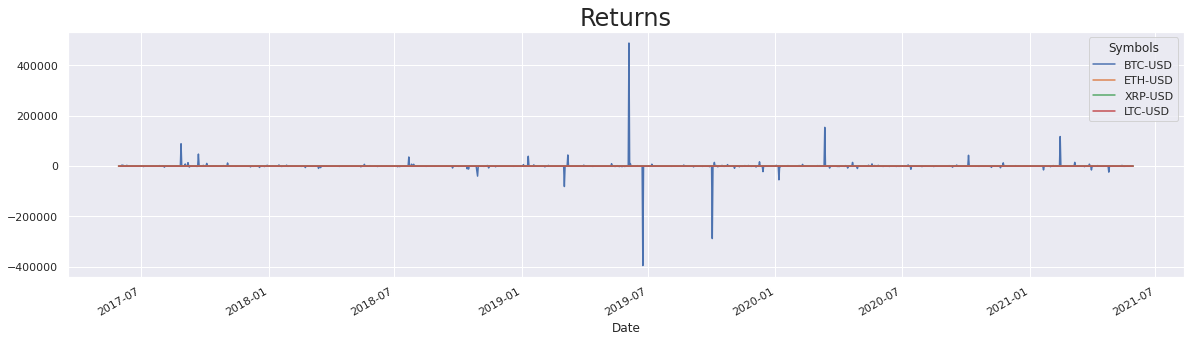

In [ ]:
returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()

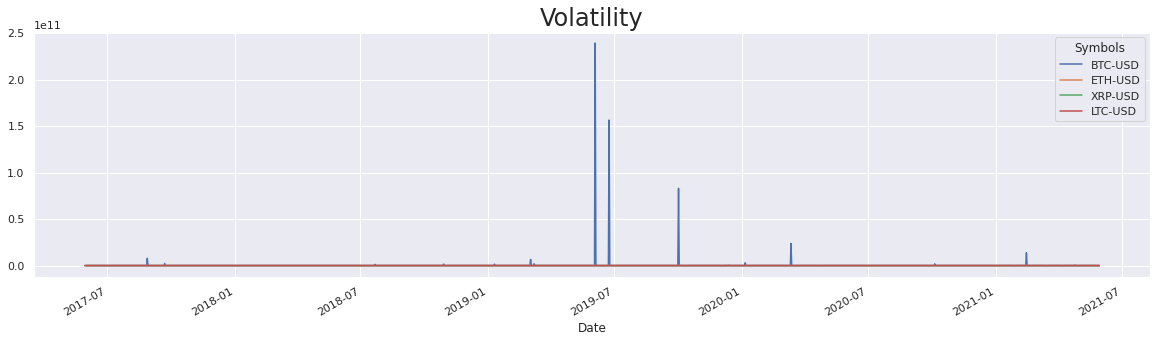

In [ ]:
sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

<H2> Ploting PACF of Returns - Estimating parameter for ARCH

In [ ]:
returns.head()

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
Date,,,,
2017-05-29,NaN,NaN,NaN,NaN
2017-05-30,NaN,-0.535546,20.097997,4.786677
2017-05-31,NaN,-3.654591,35.308403,13.858233
2017-06-01,-983.920797,0.691146,-9.053910,0.490568
2017-06-02,83.696979,0.268579,-2.922405,-4.435012


In [ ]:
sq_returns.head()

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
Date,,,,
2017-05-29,NaN,NaN,NaN,NaN
2017-05-30,NaN,0.286809,403.929464,22.912278
2017-05-31,NaN,13.356033,1246.683350,192.050614
2017-06-01,968100.135700,0.477683,81.973290,0.240657
2017-06-02,7005.184261,0.072135,8.540451,19.669332


In [ ]:
returns = returns.dropna()
returns

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
Date,,,,
2017-06-01,-983.920797,0.691146,-9.053910,0.490568
2017-06-02,83.696979,0.268579,-2.922405,-4.435012
2017-06-03,66.631860,9.339677,1.640635,1.006114
2017-06-04,4366.692786,1.276639,-1.806864,10.393959
2017-06-05,-99.885736,6.440369,-3.215952,-0.947691
...,...,...,...,...
2021-05-25,270.294449,6.726811,5.894161,8.570366
2021-05-26,-51.025829,-5.269162,-6.141869,-3.063502
2021-05-27,-216.895153,-11.568924,-7.223716,-8.181618


In [ ]:
sq_returns = sq_returns.dropna()
sq_returns

Symbols,BTC-USD,ETH-USD,XRP-USD,LTC-USD
Date,,,,
2017-06-01,9.681001e+05,0.477683,81.973290,0.240657
2017-06-02,7.005184e+03,0.072135,8.540451,19.669332
2017-06-03,4.439805e+03,87.229561,2.691683,1.012266
2017-06-04,1.906801e+07,1.629807,3.264758,108.034375
2017-06-05,9.977160e+03,41.478354,10.342347,0.898119
...,...,...,...,...
2021-05-25,7.305909e+04,45.249993,34.741133,73.451167
2021-05-26,2.603635e+03,27.764064,37.722551,9.385043
2021-05-27,4.704351e+04,133.840001,52.182066,66.938874


In [ ]:
r = np.squeeze(returns)
r_array_2d = np.array(r)
r_array_2d

array([[-9.83920797e+02,  6.91145791e-01, -9.05391021e+00,
         4.90567784e-01],
       [ 8.36969788e+01,  2.68579243e-01, -2.92240492e+00,
        -4.43501205e+00],
       [ 6.66318603e+01,  9.33967670e+00,  1.64063508e+00,
         1.00611419e+00],
       ...,
       [-2.16895153e+02, -1.15689239e+01, -7.22371553e+00,
        -8.18161807e+00],
       [-1.25360506e+02, -5.80155078e+00, -7.59430371e+00,
        -7.62040798e+00],
       [ 2.50454823e+02,  5.17363919e+00,  5.67849559e+00,
         7.35295652e+00]])

In [ ]:
returns_array = r_array_2d.flatten()
returns_array

array([-9.83920797e+02,  6.91145791e-01, -9.05391021e+00, ...,
        5.17363919e+00,  5.67849559e+00,  7.35295652e+00])

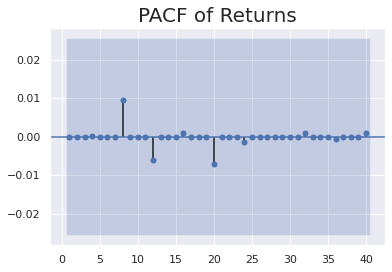

In [ ]:
sgt.plot_pacf(returns_array[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

<H2> Ploting PACF of Sq_Returns - Estimating parameter for ARCH

In [ ]:
s = np.squeeze(sq_returns)
sq_array_2d = np.array(s)
sq_array_2d

array([[9.68100136e+05, 4.77682504e-01, 8.19732901e+01, 2.40656751e-01],
       [7.00518426e+03, 7.21348095e-02, 8.54045054e+00, 1.96693319e+01],
       [4.43980481e+03, 8.72295608e+01, 2.69168346e+00, 1.01226576e+00],
       ...,
       [4.70435072e+04, 1.33840001e+02, 5.21820660e+01, 6.69388742e+01],
       [1.57152564e+04, 3.36579914e+01, 5.76734489e+01, 5.80706177e+01],
       [6.27276186e+04, 2.67665424e+01, 3.22453122e+01, 5.40659696e+01]])

In [ ]:
sq_array_returns = sq_array_2d.flatten()
sq_array_returns

array([9.68100136e+05, 4.77682504e-01, 8.19732901e+01, ...,
       2.67665424e+01, 3.22453122e+01, 5.40659696e+01])

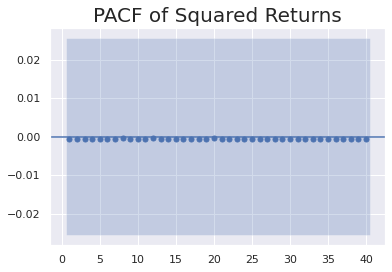

In [ ]:
sgt.plot_pacf(sq_array_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [ ]:
size = int(len(df)*0.8)
df_train, df_test = df.iloc[:size], df.iloc[size:]

In [ ]:
df_test.head

<bound method NDFrame.head of Symbols        BTC-USD      ETH-USD   XRP-USD     LTC-USD
Date                                                     
2020-08-08 -150.657757   391.120453  0.288653   57.139030
2020-08-09 -360.168658   395.887573  0.294659   58.288845
2020-08-10 -327.116069   380.384064  0.284449   54.386845
2020-08-11 -138.828414   391.024170  0.284930   54.968586
2020-08-12   12.496462   428.741791  0.297807   57.741318
...                ...          ...       ...         ...
2021-05-25 -395.970004  2888.698730  1.033725  199.224335
2021-05-26 -193.923026  2736.488525  0.970235  193.121094
2021-05-27  226.686617  2419.906250  0.900148  177.320663
2021-05-28  -57.488872  2279.514160  0.831788  163.808105
2021-05-30 -201.472526  2397.447998  0.879021  175.852844

[292 rows x 4 columns]>

In [ ]:
df_test.tail

<bound method NDFrame.tail of Symbols        BTC-USD      ETH-USD   XRP-USD     LTC-USD
Date                                                     
2020-08-08 -150.657757   391.120453  0.288653   57.139030
2020-08-09 -360.168658   395.887573  0.294659   58.288845
2020-08-10 -327.116069   380.384064  0.284449   54.386845
2020-08-11 -138.828414   391.024170  0.284930   54.968586
2020-08-12   12.496462   428.741791  0.297807   57.741318
...                ...          ...       ...         ...
2021-05-25 -395.970004  2888.698730  1.033725  199.224335
2021-05-26 -193.923026  2736.488525  0.970235  193.121094
2021-05-27  226.686617  2419.906250  0.900148  177.320663
2021-05-28  -57.488872  2279.514160  0.831788  163.808105
2021-05-30 -201.472526  2397.447998  0.879021  175.852844

[292 rows x 4 columns]>

In [ ]:
start_index=5015

<H2> Install ARCH

In [ ]:
!pip install arch

     |████████████████████████████████| 808kB 3.9MB/s 


<H2> Importing ARCH Library  for creating ARCH and GARCH model

In [ ]:
from arch import arch_model

In [ ]:
import warnings
warnings.filterwarnings("ignore")

<H2> Creating our first ARCH(1) model 

In [ ]:
model_arch_1 = arch_model(sq_array_returns)
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 136332.73113782197
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 136332.53750143351
            Iterations: 7
            Function evaluations: 48
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -136333.
Distribution:                  Normal   AIC:                           272673.
Method:            Maximum Likelihood   BIC:                           272700.
                                        No. Observations:                 5820
Date:                Sun, May 30 2021   Df Residuals:                     5819
Time:                        17:09:40   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.4525e+07  6.371e+07      1.484      0.138 [-3.035e+07,2.194e+08]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.0778e+17  4.136e+17      0.744      0.457 [-5.028e+17,1.118e+18]
alpha[1]   7.9287e-03  1.328e-02      0.597      0.550 [-1.810e-02,3.396e-02]
beta[1]        0.9748  1.162e-02     83.862      0.000      [  0.952,  0.998]
=============================================================================

Covariance estimator: robust
"""

<h2> Setting up for very specific model propoerties as needed

In [ ]:
model_arch_1 = arch_model(sq_array_returns, mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 136839.31379243144
            Iterations: 3
            Function evaluations: 10
            Gradient evaluations: 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -136839.
Distribution:                  Normal   AIC:                           273685.
Method:            Maximum Likelihood   BIC:                           273705.
                                        No. Observations:                 5820
Date:                Sun, May 30 2021   Df Residuals:                     5819
Time:                        17:09:45   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.4525e+07  5.138e+07      1.840  6.581e-02 [-6.179e+06,1.952e+08]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.3850e+19  8.806e+18      1.573      0.116 [-3.409e+18,3.111e+19]
alpha[1]   1.4445e-12  2.979e-04  4.849e-09      1.000 [-5.838e-04,5.838e-04]
=============================================================================

Covariance estimator: robust
"""

<H2> Estimating Mean with AR components for ARCH

In [ ]:
model_arch_1 = arch_model(sq_array_returns[1:], mean = "AR", lags = [2, 3, 6], vol = "ARCH", p = 1, dist = "ged")
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     61,   Neg. LLF: 130605.69398643836
Iteration:     10,   Func. Count:    119,   Neg. LLF: 130602.29339893279
Iteration:     15,   Func. Count:    194,   Neg. LLF: 130602.20709392309
Iteration:     20,   Func. Count:    269,   Neg. LLF: 130602.2005322164
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 130602.2004341504
            Iterations: 24
            Function evaluations: 269
            Gradient evaluations: 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 AR - ARCH Model Results                                  
==========================================================================================
Dep. Variable:                                  y   R-squared:                       0.000
Mean Model:                                    AR   Adj. R-squared:                 -0.001
Vol Model:                                   ARCH   Log-Likelihood:               -130602.
Distribution:      Generalized Error Distribution   AIC:                           261218.
Method:                        Maximum Likelihood   BIC:                           261265.
                                                    No. Observations:                 5813
Date:                            Sun, May 30 2021   Df Residuals:                     5809
Time:                                    17:09:51   Df Model:                            4
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const       9.4804e+07  3.095e+07      3.063  2.191e-03  [3.414e+07,1.555e+08]
y[2]       -5.8007e-04  3.250e-03     -0.178      0.858 [-6.950e-03,5.790e-03]
y[3]       -5.8046e-04  3.160e-03     -0.184      0.854 [-6.773e-03,5.612e-03]
y[6]       -5.0611e-04  7.640e-03 -6.624e-02      0.947 [-1.548e-02,1.447e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.3867e+19  4.866e+17     28.497 1.271e-178  [1.291e+19,1.482e+19]
alpha[1]   1.2072e-10  2.246e-04  5.375e-07      1.000 [-4.402e-04,4.402e-04]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             1.0100  5.118e-03    197.353      0.000 [  1.000,  1.020]
========================================================================

Covariance estimator: robust
"""